<h1 style='text-align:center'>Investigative Analysis of Heart Disease Diagnosis</h1>

Dataset <a href="https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv">Heart Disease UCI</a>

<a id="section_n" name="section_n"></a>

## Table of Contents

* [1. Introduction](#chapter2)
    * [Heart Disease](#section_2_1)
    * [Relevant Study](#section_2_2)
    * [Research Question and Problem Statement](#section_2_3)
    * [Data Description](#section_2_4)
    * [Executive Summary](#section_2_5)
    * [Variable Description](#section_2_6)
* [2. Data Analysis and Exploration](#chapter3)
    * [Data Preparation](#section_3_1)
    * [Missing Values](#section_3_2)
    * [Outliers](#section_3_3)
    * [Encoding](#section_3_4)
    * [Exploratory Analysis and Data Visualization](#section_3_5)
* [3. Algorithm Implementation](#chapter4)
    * [Data Preparation](#section_4_1)
    * [Training A Model](#section_4_2)
    * [Optimize The Model](#section_4_3)
    * [Training A State of The Art Model](#section_4_4)
    * [Compare Model Performance](#section_4_5)
    * [Conclusion](#section_4_6)

research / latex references

*  https://0-pubmed-ncbi-nlm-nih-gov.innopac.wits.ac.za/2756873/  International application of a new probability algorithm for the diagnosis of coronary artery disease https://0-www-sciencedirect-com.innopac.wits.ac.za/science/article/pii/0002914989905249?via%3Dihub

* Categories https://rdrr.io/github/coatless/ucidata/man/heart_disease.html#heading-3 

* Another paper https://www.cabdirect.org/cabdirect/abstract/19711403775  
Coronary heart disease in seven countries.

 
*  Heart failure https://my.clevelandclinic.org/health/diseases/17069-heart-failure-understanding-heart-failure

* Heart Disease https://my.clevelandclinic.org/health/diseases/16898-coronary-artery-disease

<a id="chapter2" name="chapter2">chapter2</a> 

<h2 style="text-align:center">Introduction: Heart Disease Diagnosis</h2>

<a id="section_2_1" name="section_2_1">section_2_1</a>

<h4 style="color:lightcoral"><strong>Heart Disease</strong></h4>

<a id="section_2_2" name="section_2_2">section_2_2</a>

<h4 style="color:lightcoral"><strong>Relevant Study</strong></h4>

<a id="section_2_3" name="section_2_3">section_2_3</a>

<h4 style="color:lightcoral"><strong>Researh Question and Problem</strong></h4>

> <strong>Hypothesis:</strong>

> <strong>Relationships</strong>:

> <strong>Predictions</strong>: 

<a id="section_2_4" name="section_2_4">section_2_4</a>

<h4 style="color:lightcoral"><strong>Data Description</strong></h4>

<strong style="color:lightcoral">Age:</strong> age in years

<strong style="color:lightcoral">Sex</strong>
> 1 = Male

> 2 = Female



<strong style="color:lightcoral">Chol: Serum Cholestoral in mg/dl</strong>
> $ x \in \mathbb{R}$ 


<strong style='color:lightcoral'>Trestbps: Resting Blood Pressure (in mm Hg on admission to the hospital)</strong>
> $ x \in \mathbb{R}$ 


<strong style="color:lightcoral">Chest Pain Type</strong>
> Value 1 = Typical Angina

> Value 2 = Atypical Angina

> Value 3 = Non-Anginal Pain

> Value 4 = Asymptomatic



<strong style="color:lightcoral">Thalach: Maximum Heart Rate Achieved</strong>
> $ x \in \mathbb{R}$ 


<strong style="color:lightcoral">Exang: Exercise Induced Angina </strong>
> 1 = Yes

> 0 = No

<strong style="color:lightcoral">Fasting Blood Sugar > 120 mg</strong>
> 1 = True

> 2 = False 


<strong style="color:lightcoral">Resting Electrocardiographic Results</strong>
>  Value 0=  Normal

>  Value 2=Having ST-T Wave Abnormality (T Wave Inversions)

>  Value 3= Showing Probable or Definite Left Ventricular Hypertrophy

<strong style='color:lightcoral'>OldPeak = ST Depression Induced by Exercise Relative to Eest</strong>
> $ x \in \mathbb{R}$ 



<strong style='color:lightcoral'>ca: Number of Major Vessels (0-3) colored by flourosopy</strong>

<strong style='color:lightcoral'>thal: </strong>
> 3 = normal

> 6 = fixed defect

> 7 = reversable defect

<strong style="color:lightcoral">Slope: The Slope of the Peak Exercise of ST Segment</strong>
>  Value 1= Upsloping

>  Value 2= Flat

>  Value 3= Downsloping


<strong style="color:lightcoral">Target: Presence of Heart Disease</strong>
>  Value 0= Absence

>  Value 1= Presence


<a id="section_2_5" name="section_2_5">section_2_5</a>

<h4 style="color:lightcoral"><strong>Executive Summary</strong></h4>

<a id="chapter3" name="chapter3">chapter3</a> 

<h2 style="text-align:center">Data Analysis and Exploration</h2>

<a id="section_3_1" name="section_3_1">section_3_1</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import engine.data_preparation as dp
import engine.data_visualization as dv
import engine.logistic_regression as lr
import engine.accuracy as acc
import seaborn as sns
import warnings
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')
%load_ext autoreload

%autoreload

<h4 style="color:lightcoral"><strong>Data Preparation</strong></h4>

> Read dataset 

> Appropriately change data types

> Description 
> * Number of rows
> * Number of features

> Is the data balanced ?


In [2]:
dir_str = "Datasets/data/processed.{}.data"
names = {"age":"Age","sex":"Sex","cp":"Chest Pain Type","trestbps":"Resting Blood Pressure","chol":"Serum Cholestoral In mg/dl",
         "fbs":"Fasting Blood Sugar > 120 mg/dl","restecg":"Resting Electrocardiographic Results","thalach":"Duration of Exercise In Minutes",
         "exang":"Exercise Induced Angina","oldpeak":"ST Depression Induced By Exercise","slope":"The Slope of The Peak Exercise ST Segment",
         "ca":"Number of Major Vessels","thal":"Normal/Fixed or Reversable Defect","num":"Presence"
        }
convert_dict = {'sex': int,'cp': int,'fbs':int,'restecg':int,'exang':int,'slope':int,'ca':int,'num':int}
columns = list(names.keys())

In [3]:
cleveland = pd.read_csv(dir_str.format("cleveland"),names=columns,na_values='?')
hungarian = pd.read_csv(dir_str.format("hungarian"),names=columns,na_values='?')
switzerland = pd.read_csv(dir_str.format("switzerland"),names=columns,na_values='?')
va = pd.read_csv(dir_str.format("va"),names=columns,na_values='?')
print("{}: Number of Rows: {} x Number of Columns: {} ".format("cleveland",len(cleveland),len(cleveland.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("hungarian",len(hungarian),len(hungarian.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("switzerland",len(switzerland),len(switzerland.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("long beach",len(va),len(va.columns)))
print('======================================================================================================')
cleveland.head()

cleveland: Number of Rows: 303 x Number of Columns: 14 
hungarian: Number of Rows: 294 x Number of Columns: 14 
switzerland: Number of Rows: 123 x Number of Columns: 14 
long beach: Number of Rows: 200 x Number of Columns: 14 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
cleveland = dp.group_target(cleveland);hungarian =  dp.group_target(hungarian)
switzerland = dp.group_target(switzerland);va =  dp.group_target(va)
heart_data = pd.concat([cleveland,hungarian,switzerland,va])
heart_data = heart_data.drop_duplicates()

<a id="section_3_2" name="section_3_2">section_3_2</a>

<h4 style="color:lightcoral"><strong>Missing Values</strong></h4>
<strong style="color:lightcoral">Goals</strong>: Create 3 different datasets from:

> Dropping values

> Replacing missing values with the means

> Learn the missing feature using an algorithm


In [5]:
# ============== Drop Missing Values
drop_missing_cleveland = (cleveland.copy().dropna()).astype(convert_dict)
drop_missing_hungarian = ( hungarian.copy().dropna()).astype(convert_dict)
drop_missing_switzerland = (switzerland.copy().dropna()).astype(convert_dict)
drop_missing_va = (va.copy().dropna()).astype(convert_dict)
drop_missing_heart = (heart_data.copy().dropna()).astype(convert_dict) # This is the combined dataset


# ================ Mode Dataset  - Missing values replaced with the mode
mode_cleveland = ((dp.replace_missing_with_mode(cleveland.copy())).astype(convert_dict)).drop_duplicates()
mode_hungarian = ((dp.replace_missing_with_mode(hungarian.copy())).astype(convert_dict)).drop_duplicates()
mode_switzerland = ((dp.replace_missing_with_mode(switzerland.copy())).astype(convert_dict)).drop_duplicates()
mode_va = ((dp.replace_missing_with_mode(va.copy())).astype(convert_dict)).drop_duplicates()
mode_heart = ((dp.replace_missing_with_mode(heart_data.copy())).astype(convert_dict)).drop_duplicates()



# ================ Learned Missing Features Dataset 

<a id="section_3_3" name="section_3_3">section_3_3</a>

<h4 style="color:lightcoral"><strong>Outliers</strong></h4>

<a id="section_3_4" name="section_3_4">section_3_4</a>

<h4 style="color:lightcoral"><strong>Encoding</strong></h4>
<strong style="color:lightcoral">Goals</strong>: Encode the data for model preparation

> One-Hot encode dataset


In [6]:
# ============== Drop Missing Values
encode_drop_missing_cleveland = dp.one_hot_encoding_2(drop_missing_cleveland)
encode_drop_missing_hungarian = dp.one_hot_encoding_2(drop_missing_hungarian)
encode_drop_missing_switzerland = dp.one_hot_encoding_2(drop_missing_switzerland)
encode_drop_missing_va = dp.one_hot_encoding_2(drop_missing_va)
encode_drop_missing_heart = dp.one_hot_encoding_2(drop_missing_heart)

# ================ Mode Dataset  - Missing values replaced with the mode
encode_mode_cleveland = dp.one_hot_encoding_2(mode_cleveland)
encode_mode_hungarian = dp.one_hot_encoding_2(mode_hungarian)
encode_mode_switzerland = dp.one_hot_encoding_2(mode_switzerland)
encode_mode_va = dp.one_hot_encoding_2(mode_va)
encode_mode_heart = dp.one_hot_encoding_2(mode_heart)



# ================ Learned Missing Features Dataset 

<a id="section_3_5" name="section_3_5">section_3_5</a>

<h4 style="color:lightcoral"><strong>Exploratory Analysis and Data Visualization</strong></h4>


> Countplots

> Histogram

> Box Plot


In [7]:
categories = list(convert_dict.keys())
continuous = list(filter(lambda x:x not in categories,drop_missing_cleveland.columns))
drop_missing_cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145.0,233.0,1,1,150.0,0,2.3,1,0,6.0,0
1,67.0,1,1,160.0,286.0,0,1,108.0,1,1.5,1,1,1.0,1
2,67.0,1,1,120.0,229.0,0,1,129.0,1,2.6,1,1,7.0,1
3,37.0,1,1,130.0,250.0,0,0,187.0,0,3.5,1,0,1.0,0
4,41.0,0,1,130.0,204.0,0,1,172.0,0,1.4,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0,1,140.0,241.0,0,0,123.0,1,0.2,1,0,7.0,1
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,1,0,7.0,1
299,68.0,1,1,144.0,193.0,1,0,141.0,0,3.4,1,1,7.0,1
300,57.0,1,1,130.0,131.0,0,0,115.0,1,1.2,1,1,7.0,1


<AxesSubplot:xlabel='sex', ylabel='age'>

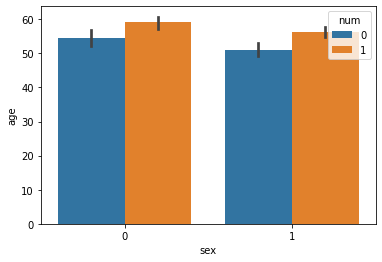

In [8]:
description_dataset = dp.make_description_dataset(drop_missing_cleveland,categories)
sns.barplot(x="sex", y="age", data=drop_missing_cleveland,hue='num')

<AxesSubplot:xlabel='num', ylabel='count'>

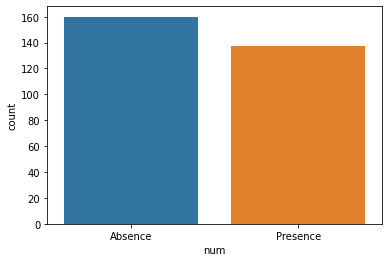

In [9]:
sns.countplot(x="num",data=description_dataset)

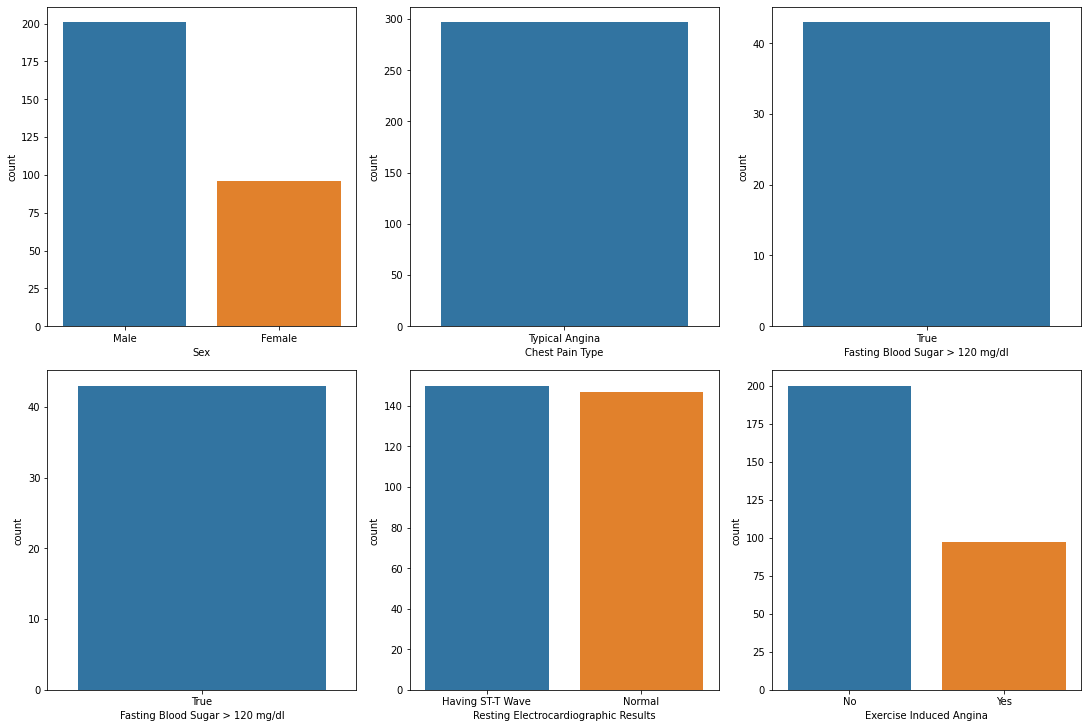

In [10]:
dv.count_plot_categories(description_dataset,categories,names)

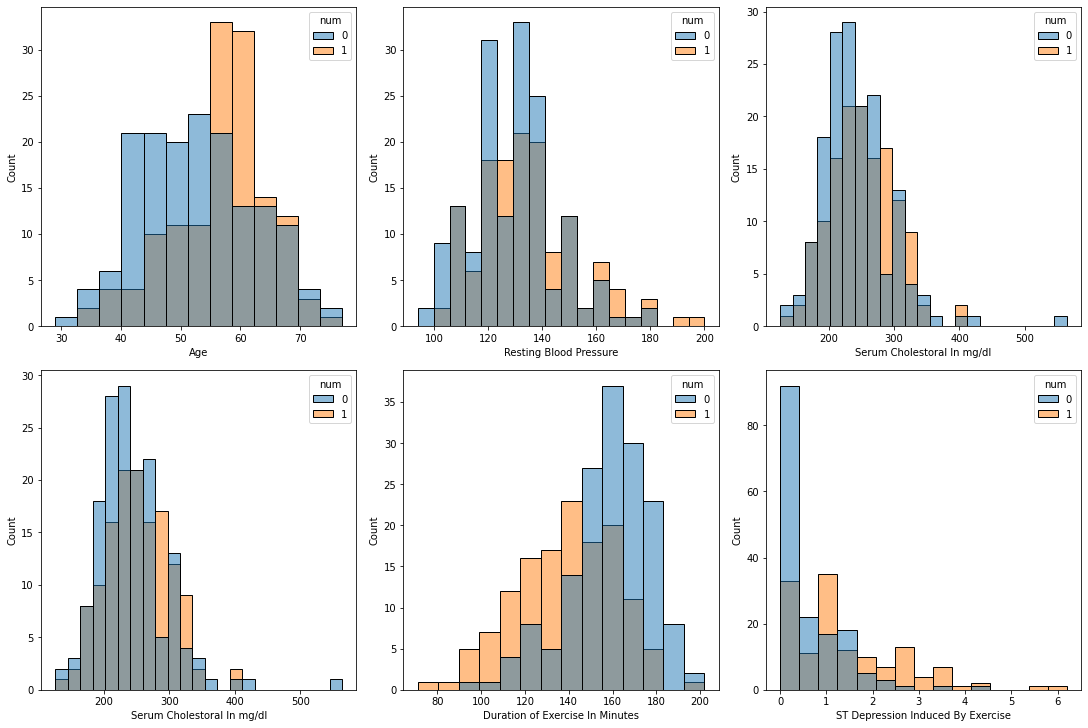

In [11]:
dv.hist_plot_continuous(drop_missing_cleveland,continuous,names,n=3,m=2,hue='num')

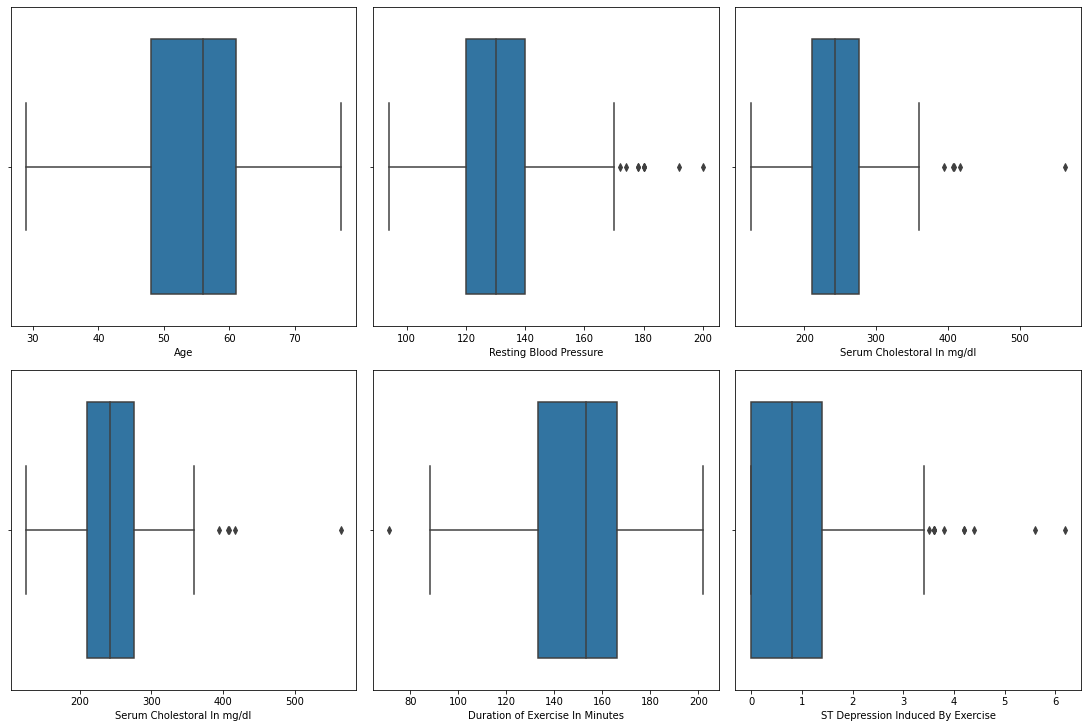

In [12]:
dv.box_plot_continuous(drop_missing_cleveland,continuous,names,n=3,m=2,hue='num')

<a id="chapter_4" name="chapter_4">chapter_4</a>

<h2 style="text-align:center">Algorithm</h2>

> Train a model to predict heart disease 
> * Perform Hyperparameter Tuning

> Optimize the model to predict heart disease 
> * Perform Hyperparameter Tuning

> Train a state of the art algorithm

> Compare the three models and interpret the results
\

> Finalize the choice of the final model

<a id="section_4_1" name="section_4_1">section_4_1</a>

<h4 style="color:lightcoral"><strong>Data Preparation</strong></h4>

> Train Validation Test Split

> Cross-Validation using K-Fold

> Set the hyperparameters of the model


In [13]:
cleveland_dataset = encode_drop_missing_cleveland.copy()
cleveland_dataset = dp.minmax_scale(cleveland_dataset)
cleveland_dataset = dp.add_bias(cleveland_dataset)
cleveland_dataset = cleveland_dataset.sample(frac=1).reset_index(drop=True)

In [14]:
X = cleveland_dataset.iloc[:,:-1]
y = cleveland_dataset.iloc[:,-1] # # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
sixty_split =  int(len(cleveland_dataset) * 0.6)
twenty_split = int(len(cleveland_dataset) * 0.2)
X_train = X.iloc[:sixty_split];X_valid = X.iloc[sixty_split:sixty_split+twenty_split];X_test = X.iloc[sixty_split+twenty_split:]
y_train = y.iloc[:sixty_split];y_valid = y.iloc[sixty_split:sixty_split+twenty_split];y_test = y.iloc[sixty_split+twenty_split:]

In [15]:
training_data = X_train.join(y_train)
validation_data = X_valid.join(y_valid)
testing_data = X_test.join(y_test)
testing_data.head()

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,fbs_0,fbs_1,restecg_0,restecg_1,exang_0,exang_1,slope_1,ca_0,ca_1,num
237,1.0,0.187500,0.245283,0.239726,0.847328,0.612903,1.0,0.0,1.0,1,1.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,1
238,1.0,0.583333,0.528302,0.095890,0.786260,0.258065,0.0,0.0,1.0,1,1.0,0.0,1.0,0.0,1.0,0.0,1,1.0,0.0,0
239,1.0,0.291667,0.264151,0.198630,0.717557,0.032258,0.0,1.0,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0,1,1.0,0.0,0
240,1.0,0.645833,0.528302,0.301370,0.656489,0.419355,1.0,1.0,0.0,1,1.0,0.0,0.0,1.0,1.0,0.0,1,0.0,1.0,1
241,1.0,0.354167,0.245283,0.280822,0.557252,0.129032,1.0,0.0,1.0,1,1.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0.0,1


In [16]:
learning_rates =  [0.2,0.3,0.4,0.5,0.6]
epochs = [100,120,150,200,250]

<a id="section_4_2" name="section_4_2">section_4_2</a>

<h4 style="color:lightcoral"><strong>Training A Model</strong></h4>

> Train A Logistic regression model

> Tune hyperparameters

> Choose the best model


In [17]:
hyperparameter = lr.validation(training_data,validation_data,y_valid,learning_rates =  [0.2,0.3,0.4,0.5,0.6],epochs = [100,120,150,200,250]) 

In [18]:
lrate = learning_rates[hyperparameter]
npochs = epochs[hyperparameter]
print("The tuned learning rate hyperparemter is :", lrate)
print("The tuned epochs hyperparemter is :", npochs)

The tuned learning rate hyperparemter is : 0.5
The tuned epochs hyperparemter is : 200


In [19]:
coefficients,_ = lr.sgd(training_data,lrate,npochs) # lrate = 0.4, npochs = 150

In [20]:
coefficients = np.array(coefficients).reshape(len(coefficients),1)
predictions = acc.predict(testing_data,coefficients)
results = acc.thresold_results(testing_data,coefficients)

In [21]:
testing_data['predicted'] = results
testing_data.head()

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,...,fbs_1,restecg_0,restecg_1,exang_0,exang_1,slope_1,ca_0,ca_1,num,predicted
237,1.0,0.187500,0.245283,0.239726,0.847328,0.612903,1.0,0.0,1.0,1,...,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,1,0
238,1.0,0.583333,0.528302,0.095890,0.786260,0.258065,0.0,0.0,1.0,1,...,0.0,1.0,0.0,1.0,0.0,1,1.0,0.0,0,0
239,1.0,0.291667,0.264151,0.198630,0.717557,0.032258,0.0,1.0,0.0,1,...,0.0,1.0,0.0,1.0,0.0,1,1.0,0.0,0,0
240,1.0,0.645833,0.528302,0.301370,0.656489,0.419355,1.0,1.0,0.0,1,...,0.0,0.0,1.0,1.0,0.0,1,0.0,1.0,1,1
241,1.0,0.354167,0.245283,0.280822,0.557252,0.129032,1.0,0.0,1.0,1,...,0.0,0.0,1.0,1.0,0.0,1,1.0,0.0,1,1


In [22]:
acc.accuracy_metric(y_test,np.array(results))

83.33333333333334

Text(0.5, 0, 'Number of Iterations')

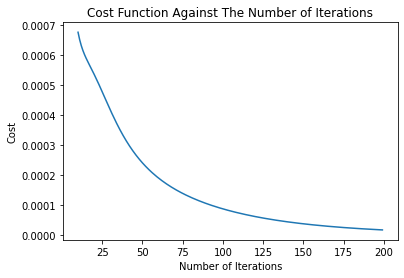

In [23]:
plt.plot(range(npochs)[10:],_[10:])
plt.title("Cost Function Against The Number of Iterations")
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")

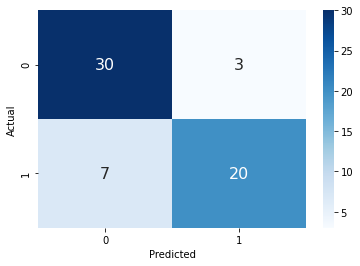

In [24]:
acc.display_confusion_matrix(y_test,results)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.939


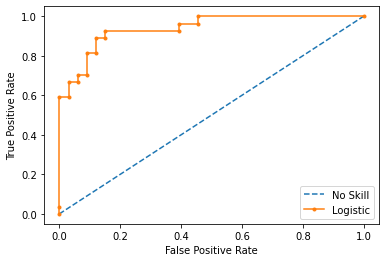

In [25]:
acc.plot_roc_curve(y_test,predictions)

<a id="section_4_3" name="section_4_3">section_4_3</a>

<h4 style="color:lightcoral"><strong>Optimize The Model</strong></h4>

> Train An Optimized Logistic regression model

> Tune hyperparameters

> Choose the best model


<a id="section_4_4" name="section_4_4">section_4_4</a>

<h4 style="color:lightcoral"><strong>Training A State of The Art Model</strong></h4>

> Train A Logistic regression model


<a id="section_4_5" name="section_4_5">section_4_5</a>

<h4 style="color:lightcoral"><strong>Compare Model Performance</strong></h4>

> Train A Logistic regression model


<a id="section_4_6" name="section_4_6">section_4_6</a>

<h4 style="color:lightcoral"><strong>Conclusion</strong></h4>

[back to top](#section_n)